In [2]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [47]:
data = np.load(file="04_log_regression_data.npy")
data

array([[5.92630908e+00, 1.86881286e+05, 0.00000000e+00],
       [8.69236334e+00, 2.97526294e+05, 1.00000000e+00],
       [7.15393982e+00, 2.70812911e+05, 0.00000000e+00],
       ...,
       [7.28205582e+00, 2.31844517e+05, 1.00000000e+00],
       [6.04723425e+00, 3.40718342e+05, 1.00000000e+00],
       [6.92814858e+00, 1.79461130e+05, 0.00000000e+00]])

In [70]:
X_raw = data[:, :2]
Y = data[:, 2]

X = zscore(X_raw, axis=0)

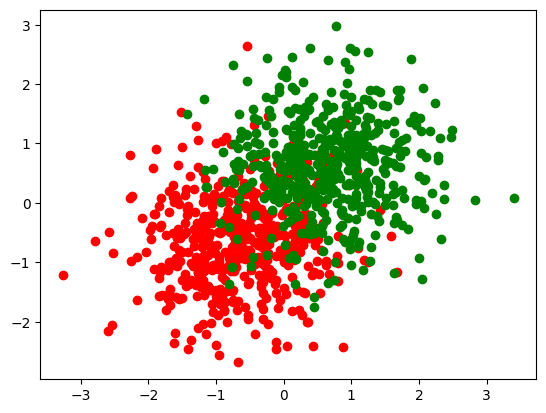

In [38]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="red")
plt.scatter(X[Y==1, 0], X[Y==1, 1], c="green")

In [39]:
def logistic_regression(theta, x):
    return 1 / (1 + np.exp(-np.matmul(theta, x)))

In [64]:
def train_logit_classifier(X, Y, epochs, lnr):
    theta = np.zeros(X.shape[0])
    loss = []
    for epoch in range(epochs):
        theta -= lnr * np.mean((logistic_regression(theta, X) - Y) * X, axis=1)
        p_hat = logistic_regression(theta, X)
        loss.append(-np.mean(Y*np.log(p_hat) + (1 - Y)*np.log(1 - p_hat)))
    return theta, loss
        


In [65]:
print(len(X))
X = np.vstack((np.ones(X.shape[0]), X.T))

theta, loss = train_logit_classifier(X, Y, 15000, 0.002)

1000


In [66]:
print(theta)
print(loss)

[-0.01346827  1.71581891  1.64283888]
[0.6927412248607943, 0.6923358534430452, 0.6919310654647364, 0.6915268600843308, 0.6911232364607193, 0.6907201937532268, 0.6903177311216152, 0.6899158477260892, 0.6895145427272991, 0.689113815286347, 0.6887136645647898, 0.688314089724644, 0.6879150899283911, 0.6875166643389794, 0.6871188121198307, 0.6867215324348437, 0.6863248244483977, 0.6859286873253579, 0.6855331202310787, 0.685138122331408, 0.684743692792692, 0.6843498307817784, 0.6839565354660211, 0.6835638060132847, 0.683171641591947, 0.682780041370905, 0.6823890045195774, 0.6819985302079091, 0.6816086176063757, 0.6812192658859865, 0.6808304742182891, 0.6804422417753732, 0.680054567729874, 0.6796674512549766, 0.6792808915244201, 0.6788948877125002, 0.6785094389940739, 0.6781245445445637, 0.6777402035399602, 0.6773564151568269, 0.6769731785723025, 0.6765904929641064, 0.6762083575105411, 0.6758267713904956, 0.6754457337834506, 0.6750652438694801, 0.6746853008292566, 0.6743059038440532, 0.673927

In [67]:
X_boundary = np.array((np.min(X[1]), np.max(X[1])))

In [68]:
print(X_boundary)

[-3.26575073  3.40087945]


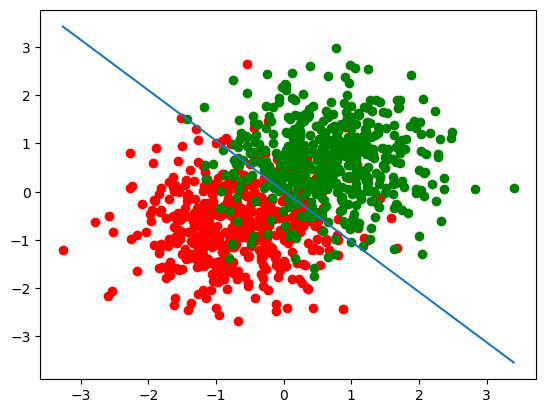

In [71]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="red")
plt.scatter(X[Y==1, 0], X[Y==1, 1], c="green")
plt.plot(X_boundary, -(theta[0] + theta[1]*X_boundary / theta[2]))

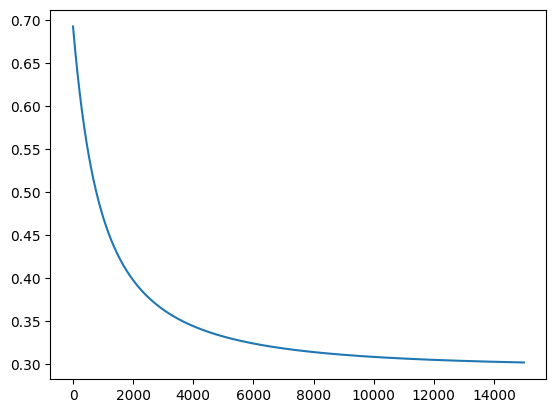

In [72]:
plt.plot(loss)